# More on Missing Data - Lab

## Introduction

In this lab, you'll continue to practice techniques for dealing with missing data. Moreover, you'll observe the impact on distributions of your data produced by various techniques for dealing with missing data.

## Objectives

In this lab you will: 

- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset   
- Determine how the distribution of data is affected by imputing values 

## Load the data

To start, load the dataset `'titanic.csv'` using pandas.

In [1]:
# Your code here
import pandas as pd

# Load the dataset
titanic_data = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset to understand its structure
print(titanic_data.head())



   PassengerId  Survived Pclass  \
0          1.0       0.0      3   
1          2.0       1.0      1   
2          3.0       1.0      3   
3          4.0       1.0      1   
4          5.0       0.0      3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0    1.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
2                             Heikkinen, Miss. Laina  female  26.0    0.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
4                           Allen, Mr. William Henry    male  35.0    0.0   

   Parch            Ticket     Fare Cabin Embarked  
0    0.0         A/5 21171   7.2500   NaN        S  
1    0.0          PC 17599  71.2833   C85        C  
2    0.0  STON/O2. 3101282   7.9250   NaN        S  
3    0.0            113803  53.1000  C123        S  
4    0.0            373450   8.0500   NaN        S  


Use the `.info()` method to quickly preview which features have missing data

In [2]:
# Your code here
# Use the .info() method to preview information about the dataset
titanic_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1391 non-null   float64
 1   Survived     1391 non-null   float64
 2   Pclass       1391 non-null   object 
 3   Name         1391 non-null   object 
 4   Sex          1391 non-null   object 
 5   Age          1209 non-null   float64
 6   SibSp        1391 non-null   float64
 7   Parch        1391 non-null   float64
 8   Ticket       1391 non-null   object 
 9   Fare         1391 non-null   float64
 10  Cabin        602 non-null    object 
 11  Embarked     1289 non-null   object 
dtypes: float64(6), object(6)
memory usage: 130.5+ KB


## Observe previous measures of centrality

Let's look at the `'Age'` feature. Calculate the mean, median, and standard deviation of this feature. Then plot a histogram of the distribution.

Mean Age: 29.731894127378
Median Age: 27.0
Standard Deviation of Age: 16.070124603444675


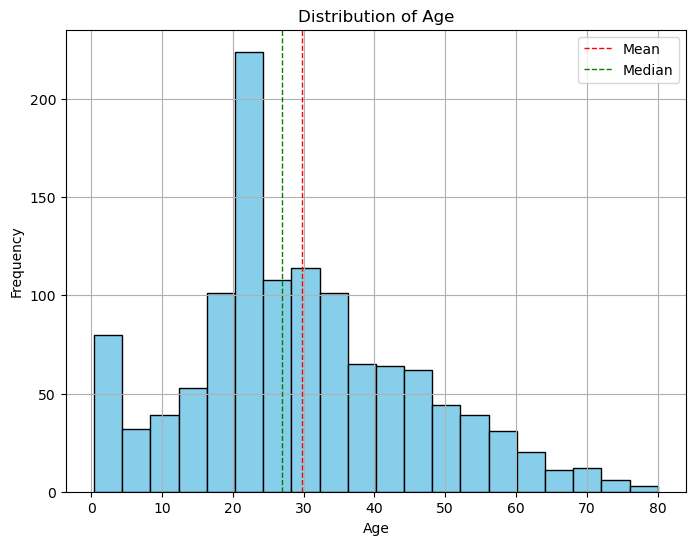

In [3]:
# Your code here
import matplotlib.pyplot as plt

# Calculate mean, median, and standard deviation of the 'Age' feature
age_mean = titanic_data['Age'].mean()
age_median = titanic_data['Age'].median()
age_std = titanic_data['Age'].std()

print("Mean Age:", age_mean)
print("Median Age:", age_median)
print("Standard Deviation of Age:", age_std)

# Plot histogram of the 'Age' feature
plt.figure(figsize=(8, 6))
plt.hist(titanic_data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(age_mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(age_median, color='green', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.grid(True)
plt.show()


## Impute missing values using the mean 

Fill the missing `'Age'` values using the average age. (Don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

Mean Age (Imputed): 29.731894127377995
Median Age (Imputed): 29.731894127378
Standard Deviation of Age (Imputed): 14.981155476045366


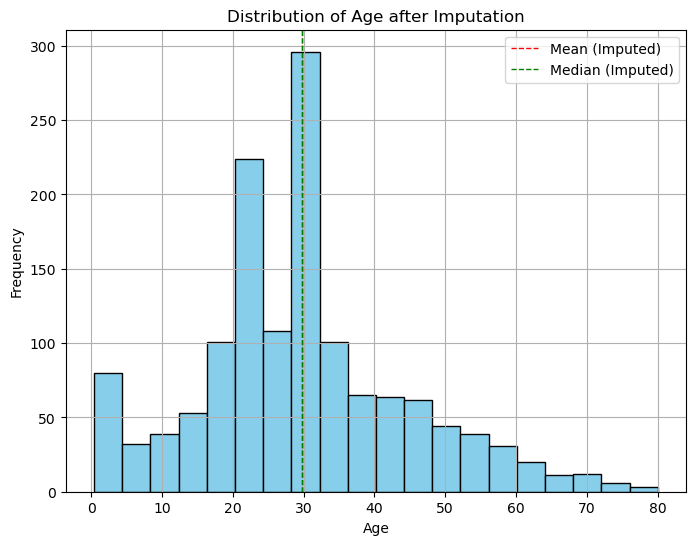

In [4]:
# Your code here
import numpy as np

# Make a copy of the original DataFrame to avoid overwriting the original data
titanic_data_imputed = titanic_data.copy()

# Fill missing values in the 'Age' column with the mean age
mean_age = titanic_data_imputed['Age'].mean()
titanic_data_imputed['Age'].fillna(mean_age, inplace=True)

# Recalculate mean, median, and standard deviation of the 'Age' feature
imputed_age_mean = titanic_data_imputed['Age'].mean()
imputed_age_median = titanic_data_imputed['Age'].median()
imputed_age_std = titanic_data_imputed['Age'].std()

print("Mean Age (Imputed):", imputed_age_mean)
print("Median Age (Imputed):", imputed_age_median)
print("Standard Deviation of Age (Imputed):", imputed_age_std)

# Plot histogram of the 'Age' feature after imputation
plt.figure(figsize=(8, 6))
plt.hist(titanic_data_imputed['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age after Imputation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(imputed_age_mean, color='red', linestyle='dashed', linewidth=1, label='Mean (Imputed)')
plt.axvline(imputed_age_median, color='green', linestyle='dashed', linewidth=1, label='Median (Imputed)')
plt.legend()
plt.grid(True)
plt.show()



### Commentary

Note that the standard deviation dropped, the median was slightly raised and the distribution has a larger mass near the center.

## Impute missing values using the median 

Fill the missing `'Age'` values, this time using the median age. (Again, don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

Mean Age (Imputed with Median): 29.37445003594536
Median Age (Imputed with Median): 27.0
Standard Deviation of Age (Imputed with Median): 15.009475778073446


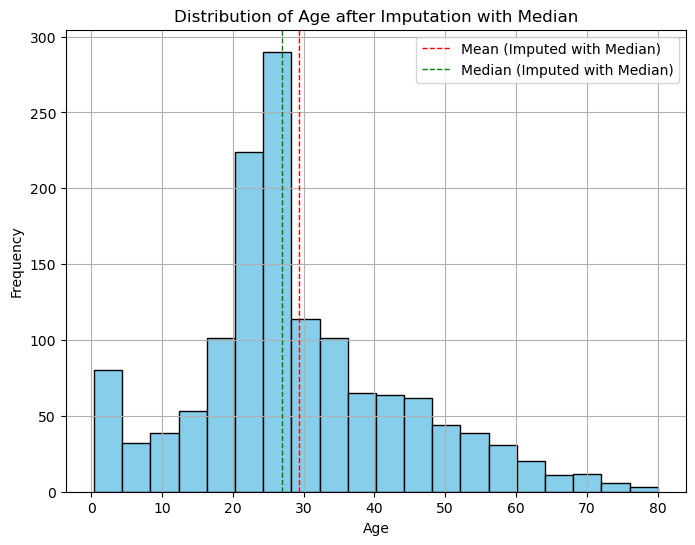

In [6]:
# Your code here
# Make another copy of the original DataFrame to avoid overwriting the original data
titanic_data_imputed_median = titanic_data.copy()

# Fill missing values in the 'Age' column with the median age
median_age = titanic_data_imputed_median['Age'].median()
titanic_data_imputed_median['Age'].fillna(median_age, inplace=True)

# Recalculate mean, median, and standard deviation of the 'Age' feature
imputed_median_age_mean = titanic_data_imputed_median['Age'].mean()
imputed_median_age_median = titanic_data_imputed_median['Age'].median()
imputed_median_age_std = titanic_data_imputed_median['Age'].std()

print("Mean Age (Imputed with Median):", imputed_median_age_mean)
print("Median Age (Imputed with Median):", imputed_median_age_median)
print("Standard Deviation of Age (Imputed with Median):", imputed_median_age_std)

# Plot histogram of the 'Age' feature after imputation with median
plt.figure(figsize=(8, 6))
plt.hist(titanic_data_imputed_median['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age after Imputation with Median')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(imputed_median_age_mean, color='red', linestyle='dashed', linewidth=1, label='Mean (Imputed with Median)')
plt.axvline(imputed_median_age_median, color='green', linestyle='dashed', linewidth=1, label='Median (Imputed with Median)')
plt.legend()
plt.grid(True)
plt.show()



### Commentary

Imputing the median has similar effectiveness to imputing the mean. The variance is reduced, while the mean is slightly lowered. You can once again see that there is a larger mass of data near the center of the distribution.

## Dropping rows

Finally, let's observe the impact on the distribution if we were to simply drop all of the rows that are missing an age value. Then, calculate the mean, median and standard deviation of the ages along with a histogram, as before.

Mean Age (After Dropping Missing Values): 29.731894127378
Median Age (After Dropping Missing Values): 27.0
Standard Deviation of Age (After Dropping Missing Values): 16.070124603444675


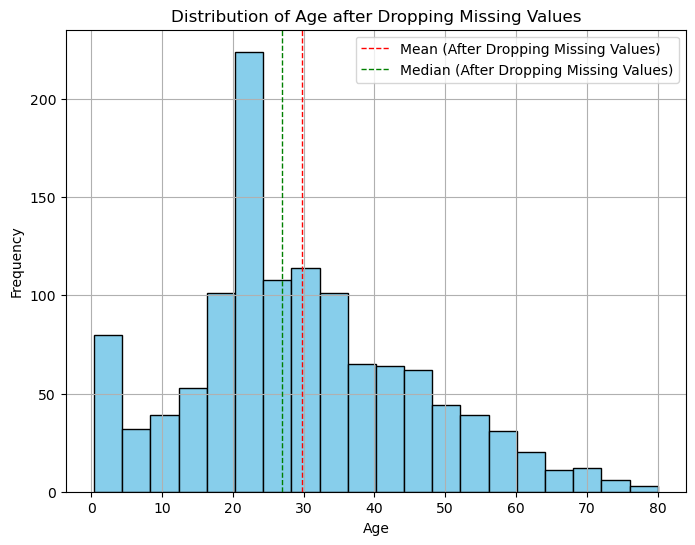

In [7]:
# Your code here
# Make a copy of the original DataFrame to avoid overwriting the original data
titanic_data_dropped = titanic_data.dropna(subset=['Age'])

# Recalculate mean, median, and standard deviation of the 'Age' feature after dropping missing values
dropped_age_mean = titanic_data_dropped['Age'].mean()
dropped_age_median = titanic_data_dropped['Age'].median()
dropped_age_std = titanic_data_dropped['Age'].std()

print("Mean Age (After Dropping Missing Values):", dropped_age_mean)
print("Median Age (After Dropping Missing Values):", dropped_age_median)
print("Standard Deviation of Age (After Dropping Missing Values):", dropped_age_std)

# Plot histogram of the 'Age' feature after dropping missing values
plt.figure(figsize=(8, 6))
plt.hist(titanic_data_dropped['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age after Dropping Missing Values')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(dropped_age_mean, color='red', linestyle='dashed', linewidth=1, label='Mean (After Dropping Missing Values)')
plt.axvline(dropped_age_median, color='green', linestyle='dashed', linewidth=1, label='Median (After Dropping Missing Values)')
plt.legend()
plt.grid(True)
plt.show()


### Commentary

Dropping missing values leaves the distribution and associated measures of centrality unchanged, but at the cost of throwing away data.

## Summary

In this lab, you briefly practiced some common techniques for dealing with missing data. Moreover, you observed the impact that these methods had on the distribution of the feature itself. When you begin to tune models on your data, these considerations will be an essential process of developing robust and accurate models.